# Pymaceuticals Inc.
---

### Analysis

-I noticed that all the mice start at 45 cubic millimeters regarding their tumor sizes. That's rather convenient for getting perfect data as timepoints come up. Regarding the efficacy of treatments, Capomulin and Ramicane had the best results of the four that were picked out. We can also see that Capomulin was helpful for the individual mouse m957, as she saw a stark dropoff of the size of her tumor over the course of the experiment. The last thing I want to point out is that there is a strong positive correlation between the weight of the mouse and the average size of their tumor, even if the tumors all start the same size. This might mean that more medicine is needed for larger subjects. 

In [173]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_mouse = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
merge_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [174]:
# Checking the number of mice.
totalmouse = len(merge_mouse['Mouse ID'].unique())
totalmouse

249

In [175]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupemouse = merge_mouse[merge_mouse.duplicated(['Mouse ID', 'Timepoint'])]
dupemouse1 = dupemouse['Mouse ID'].unique()
dupemouse1

array(['g989'], dtype=object)

In [176]:
# Optional: Get all the data for the duplicate mouse ID. 
dupemouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [177]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = merge_mouse.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [178]:
# Checking the number of mice in the clean DataFrame.
total2 = len(clean_mouse['Mouse ID'].unique())

#Notice 249 stays the same because we drop the duplicates, not all instances of mouse g989
proof= clean_mouse.loc[clean_mouse["Mouse ID"]=="g989",:]
proof
control= merge_mouse.loc[merge_mouse["Mouse ID"]=="g989",:]
control


#the answer is:

total2


249

## Summary Statistics

In [179]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
r_means = clean_mouse.groupby("Drug Regimen")[['Tumor Volume (mm3)']].mean()
r_medians= clean_mouse.groupby('Drug Regimen')[['Tumor Volume (mm3)']].median()
r_var= clean_mouse.groupby('Drug Regimen')[['Tumor Volume (mm3)']].var()
r_stdev= clean_mouse.groupby('Drug Regimen')[['Tumor Volume (mm3)']].std()
r_sem= clean_mouse.groupby('Drug Regimen')[['Tumor Volume (mm3)']].sem()


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

R_table = pd.merge(r_means, r_medians, on='Drug Regimen')
R_table = pd.merge(R_table, r_var, on = "Drug Regimen")
R_table.rename(columns={
    "Tumor Volume (mm3)": "Tumor Volume Variance",
    "Tumor Volume (mm3)_y": "Tumor Volume Median",
    "Tumor Volume (mm3)_x": "Tumor Volume Mean"
},inplace= True)

#Can only do it in groups of 3 for some reason
R_table = pd.merge(R_table, r_stdev, on = 'Drug Regimen')
R_table = pd.merge(R_table, r_sem, on = 'Drug Regimen')

R_table.rename(columns={
    "Tumor Volume (mm3)_x": "Tumor Volume Standard Deviation",
    "Tumor Volume (mm3)_y": "Tumor Volume SEM",
},inplace=True)

R_table


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [180]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


#done above

## Bar and Pie Charts

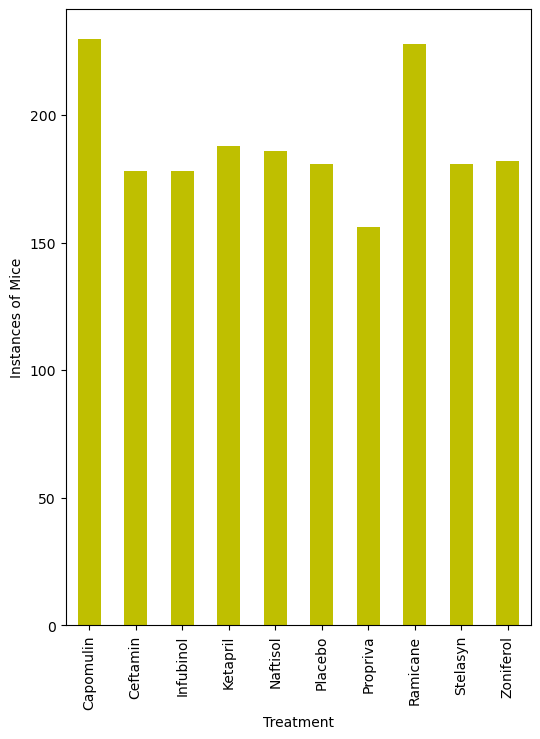

<Figure size 640x480 with 0 Axes>

In [181]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouses = clean_mouse.groupby("Drug Regimen")
treat_count = mouses['Drug Regimen'].count()

box_chart = treat_count.plot(kind='bar',color= "y", figsize=(6,8))

box_chart.set_xlabel("Treatment")
box_chart.set_ylabel('Instances of Mice')


plt.show()
plt.tight_layout()




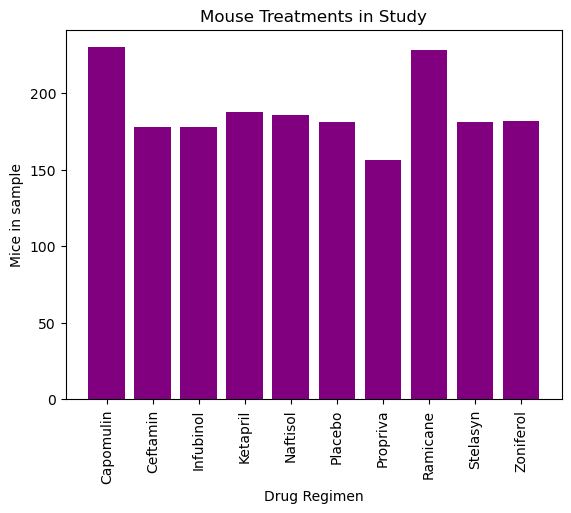

In [182]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = np.arange(len(treat_count))
tick_locations =  [value for value in x_axis]
plt.bar(x_axis, treat_count, color = 'purple', align="center")
plt.xticks(tick_locations, treat_count.index, rotation = 'vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('Mice in sample')
plt.title("Mouse Treatments in Study")
plt.show()

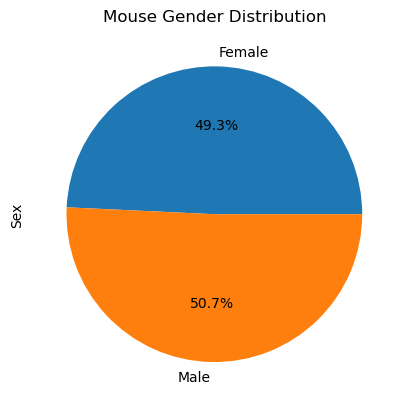

In [183]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = clean_mouse.groupby('Sex')
sex_count = mouse_sex['Sex'].count()
sex_pie = sex_count.plot(kind='pie', title="Mouse Gender Distribution", autopct = '%1.1f%%')
plt.show()


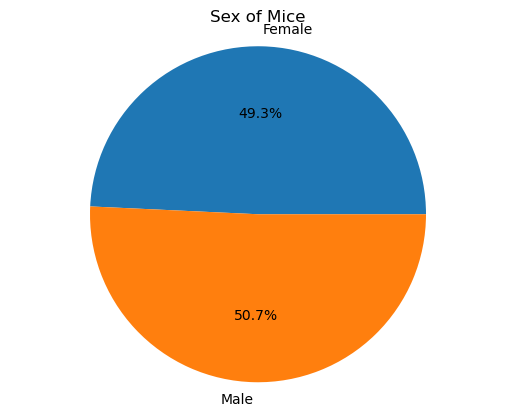

In [184]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count, labels=["Female", "Male"], autopct='%1.1f%%')
plt.title("Sex of Mice")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [191]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
startmouse = clean_mouse.drop_duplicates(subset=['Mouse ID'], keep='first')
endmouse = clean_mouse.drop_duplicates(subset=['Mouse ID'], keep='last')
endmouse.rename(columns={
    "Timepoint": "Final Timepoint",
    "Tumor Volume (mm3)": "Final Tumor Volume"
}, inplace=True)

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mergedfin= pd.merge(merge_mouse, endmouse, on = ['Mouse ID', 'Drug Regimen'])
merged_simple = mergedfin.drop_duplicates(subset=['Mouse ID'], keep ='first')
merged_reduced = merged_simple[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)','Final Tumor Volume', "Final Timepoint"]]
merged_reduced

C:\Users\slbow\AppData\Local\Temp\ipykernel_19792\1503166909.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  endmouse.rename(columns={


,Mouse ID,Drug Regimen,Tumor Volume (mm3),Final Tumor Volume,Final Timepoint
0,k403,Ramicane,45.0,22.050126,45
10,s185,Capomulin,45.0,23.343598,45
20,x401,Capomulin,45.0,28.484033,45
30,m601,Capomulin,45.0,28.430964,45
40,g791,Ramicane,45.0,29.128472,45
...,...,...,...,...,...
1858,z314,Stelasyn,45.0,45.934712,5
1860,z435,Propriva,45.0,48.710661,10
1863,z581,Infubinol,45.0,62.754451,45
1873,z795,Naftisol,45.0,65.741070,45


In [186]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drugplotdata = merged_reduced.loc[merged_reduced["Drug Regimen"]== drug ,:]
    quartiles =  drugplotdata['Final Tumor Volume'].quantile([.25,.5,.75])
    lower = quartiles[.25]
    upper = quartiles[.75]
    iqr = upper-lower
    lowerbound = lower - (1.5*iqr)
    upperbound = upper + (1.5*iqr)
    print(f'\n The lower quartile for final tumor volume in {drug} treatments is :  {lower}')
    print(f'The upper quartile for {drug} is : {upper}' )
    print(f'The interquartile range of {drug} is: {iqr}' )
    print(f'The median for {drug} is : {quartiles[.5]}'  )
    print(f'\n Values below {lowerbound} for {drug} could be outliers')
    print(f'Values greater than {upperbound} for {drug} could also be outliers')
    
    # Determine outliers using upper and lower bounds
    outliers = drugplotdata.loc[(drugplotdata["Final Tumor Volume"] < lowerbound) | 
                               (drugplotdata["Final Tumor Volume"] > upperbound)]
    
    if len(outliers) == 0:
        print(f"\n There are no outliers in {drug} treatments")
    else:
        print(f"\n There are potential outliers for {drug} at: \n")
        print(outliers.to_string(index= False))
        print("\n ----------")
  

    
    # add subset 
    drugplotdata = drugplotdata.loc[:,"Final Tumor Volume"]
    vol_list.append(drugplotdata)

    
    



 The lower quartile for final tumor volume in Capomulin treatments is :  32.37735684
The upper quartile for Capomulin is : 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The median for Capomulin is : 38.1251644

 Values below 20.70456164999999 for Capomulin could be outliers
Values greater than 51.83201549 for Capomulin could also be outliers

 There are no outliers in Capomulin treatments

 The lower quartile for final tumor volume in Ramicane treatments is :  31.56046955
The upper quartile for Ramicane is : 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The median for Ramicane is : 36.56165229

 Values below 17.912664470000003 for Ramicane could be outliers
Values greater than 54.30681135 for Ramicane could also be outliers

 There are no outliers in Ramicane treatments

 The lower quartile for final tumor volume in Infubinol treatments is :  54.04860769
The upper quartile for Infubinol is : 65.52574285
The interquartile range of Infubin

C:\Users\slbow\AppData\Local\Temp\ipykernel_19792\3251642480.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(drug_list)


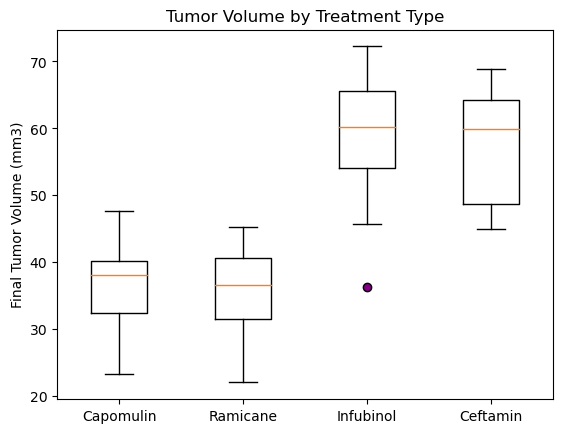

In [187]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax = plt.subplots()
ax.set_title("Tumor Volume by Treatment Type")
ax.set_ylabel("Final Tumor Volume (mm3)")
ax.set_xticklabels(drug_list)
outlier= dict(markerfacecolor='purple')
bp = ax.boxplot(vol_list, flierprops=outlier)

plt.show()



## Line and Scatter Plots

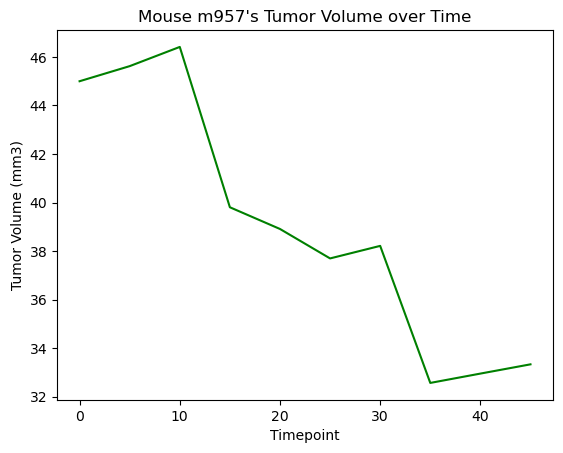

In [188]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouseind = merged_reduced.loc[merged_reduced["Drug Regimen"]=="Capomulin"]
mouseind
#choose one

#get data
mouseplot = clean_mouse.loc[clean_mouse["Mouse ID"]== 'm957' ,:]

fig2, ax2 = plt.subplots()
ax2.set_title("Mouse m957's Tumor Volume over Time")
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.set_xlabel('Timepoint')
ax2.plot(mouseplot['Timepoint'],mouseplot['Tumor Volume (mm3)'],color ='g')
plt.show()


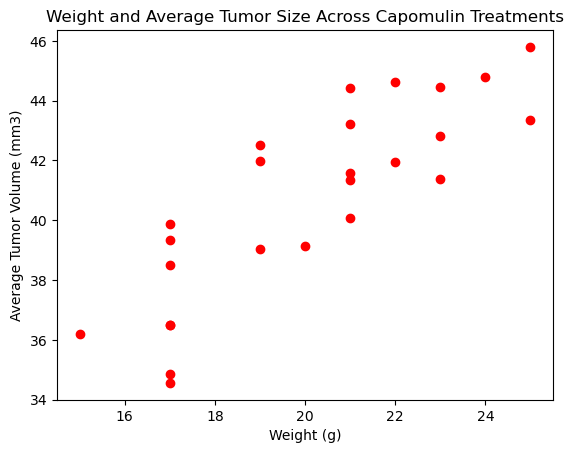

In [189]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capos = clean_mouse.loc[clean_mouse['Drug Regimen']=="Capomulin",:].groupby('Mouse ID')[[ 'Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(Capos["Weight (g)"], Capos["Tumor Volume (mm3)"], color = 'r')

plt.title("Weight and Average Tumor Size Across Capomulin Treatments")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

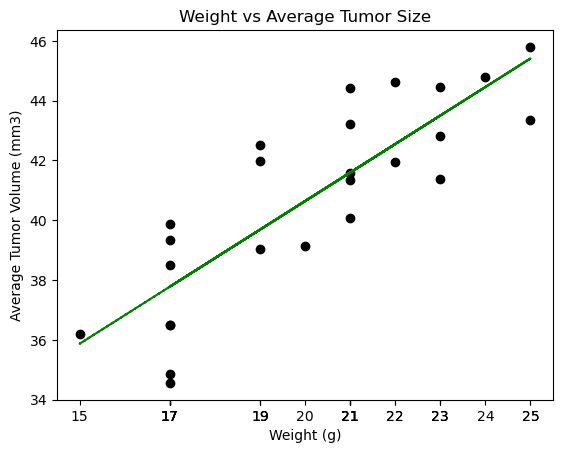

The correlation coefficient is 0.8419363424694721


In [190]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(Capos["Weight (g)"], Capos["Tumor Volume (mm3)"])
fit = slope*Capos['Weight (g)']+intercept
plt.scatter(Capos['Weight (g)'], Capos['Tumor Volume (mm3)'], color='k')
plt.plot(Capos['Weight (g)'], fit, '--', color = 'g')
plt.xticks(Capos['Weight (g)'])
plt.title('Weight vs Average Tumor Size')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

print(f'The correlation coefficient is {rvalue}')